In [25]:
qimport numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score

# Problem 1

In [3]:
train_df = pd.read_csv('/Users/aran/Desktop/Semester_2/machine learning/assignment/3/QB2022_MLR.csv')
print(train_df.head()) 
train_df.describe()



   Year           Player  Pass Yds  Yds/Att  Att  Cmp  Cmp %  TD  INT   Rate
0  2022       Jared Goff      4438      7.6  587  382   65.1  29    7   99.3
1  2022       Josh Allen      4283      7.6  567  359   63.3  35   14   96.6
2  2022       Geno Smith      4282      7.5  572  399   69.8  30   11  100.9
3  2022  Trevor Lawrence      4113      7.0  584  387   66.3  25    8   95.2
4  2022      Jalen Hurts      3701      8.0  460  306   66.5  22    6  101.6


,Year,Pass Yds,Yds/Att,Att,Cmp,Cmp %,TD,INT,Rate
count,70.0,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,2022.0,1471.514286,6.925714,209.457143,133.214286,62.860000,8.428571,5.057143,83.101429
std,0.0,1328.523608,1.461653,181.897621,118.915741,6.321012,9.004945,4.074970,17.647839
min,2022.0,37.000000,4.200000,5.000000,3.000000,44.900000,0.000000,0.000000,34.300000
25%,2022.0,324.000000,6.125000,58.750000,32.750000,58.925000,1.000000,2.000000,76.100000
50%,2022.0,954.500000,6.900000,136.000000,86.000000,63.150000,4.000000,4.000000,84.150000
75%,2022.0,2428.750000,7.575000,360.500000,230.000000,66.650000,14.000000,7.750000,92.575000
max,2022.0,4438.000000,12.600000,587.000000,399.000000,84.000000,35.000000,15.000000,146.300000


In [4]:
test_df = pd.read_csv('/Users/aran/Desktop/Semester_2/machine learning/assignment/3/QB2022_MLR_test.csv')
print(test_df.head()) 
test_df.describe()

   Year           Player  Pass Yds  Yds/Att  Att  Cmp  Cmp %  TD  INT   Rate
0  2022  Patrick Mahomes      5250      8.1  648  435   67.1  41   12  105.2
1  2022   Justin Herbert      4739      6.8  699  477   68.2  25   10   93.2
2  2022        Tom Brady      4694      6.4  733  490   66.8  25    9   90.7
3  2022     Kirk Cousins      4547      7.1  643  424   65.9  29   14   92.5
4  2022       Joe Burrow      4475      7.4  606  414   68.3  35   12  100.8


,Year,Pass Yds,Yds/Att,Att,Cmp,Cmp %,TD,INT,Rate
count,5.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,2022.0,4741.000000,7.160000,665.800000,448.000000,67.260000,31.000000,11.400000,96.480000
std,0.0,304.009046,0.642651,50.076941,33.563373,1.006479,6.928203,1.949359,6.219084
min,2022.0,4475.000000,6.400000,606.000000,414.000000,65.900000,25.000000,9.000000,90.700000
25%,2022.0,4547.000000,6.800000,643.000000,424.000000,66.800000,25.000000,10.000000,92.500000
50%,2022.0,4694.000000,7.100000,648.000000,435.000000,67.100000,29.000000,12.000000,93.200000
75%,2022.0,4739.000000,7.400000,699.000000,477.000000,68.200000,35.000000,12.000000,100.800000
max,2022.0,5250.000000,8.100000,733.000000,490.000000,68.300000,41.000000,14.000000,105.200000


In [5]:
features = ['Pass Yds','Yds/Att','Att','Cmp','Cmp %','TD','INT']
target = 'Rate'

In [6]:
X_train = train_df[features].values
y_train = train_df[target].values
X_test = test_df[features].values
y_test = test_df[target].values

In [7]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

x_train.shape

(70, 7)

In [8]:
x_train = np.c_[np.ones(x_train.shape[0]), x_train]
x_test = np.c_[np.ones(x_test.shape[0]), x_test ]
x_train.shape

(70, 8)

In [57]:
model = KernelRidge(kernel = 'linear', alpha=1e-5)
model.fit(x_train, y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("MSE for Multiple Linear Regression (Training):", mse_train)
print("MSE for Multiple Linear Regression (Test):", mse_test)

MSE for Multiple Linear Regression (Training): 80.41190455789463
MSE for Multiple Linear Regression (Test): 39.382950738892774


In [56]:
rbf_model = KernelRidge(kernel = 'rbf', alpha = 1e-5)
rbf_model.fit(x_train, y_train)
rbf_y_train_pred = rbf_model.predict(x_train)
rbf_y_test_pred = rbf_model.predict(x_test)

mse_rbf_train = mean_squared_error(y_train, rbf_y_train_pred)
mse_rbf_test = mean_squared_error(y_test, rbf_y_test_pred)
print("MSE for RBF Regression (Training):", mse_rbf_train)
print("MSE for RBF Regression (Test):", mse_rbf_test)


MSE for RBF Regression (Training): 6.026266685360385
MSE for RBF Regression (Test): 27.254812237885215


Result

Conclusion :


# Problem 2

In [24]:
k_df = pd.read_csv('/Users/aran/Desktop/Semester_2/machine learning/assignment/3/kMeansData.csv')
k_df.head()

,x1,x2
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


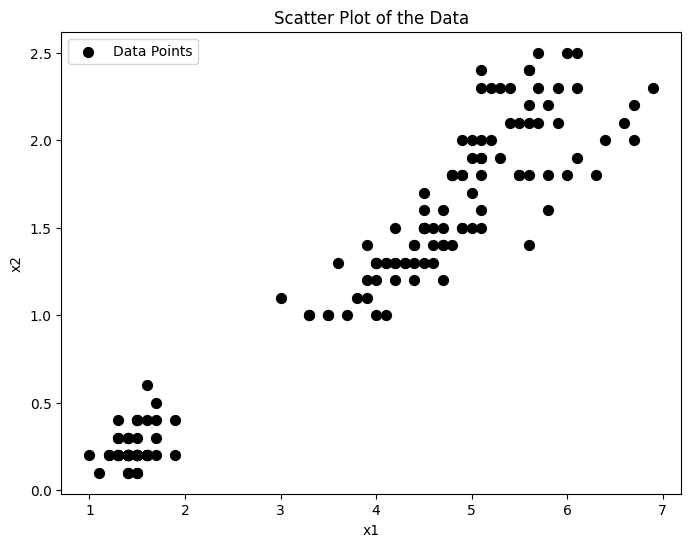

In [14]:
X = k_df[['x1', 'x2']].values

plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], s=50, c='black', label="Data Points")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Scatter Plot of the Data")
plt.legend()
plt.show()

In [15]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2, axis=1))

def kmeans(X, k=3, max_iters=1000, tol=0.001):

    np.random.seed(42)
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]

    for iteration in range(max_iters):

        labels = np.array([np.argmin(euclidean_distance(x, centroids)) for x in X])

        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        if np.linalg.norm(new_centroids - centroids) < tol:
            print(f"Converged in {iteration} iterations!")
            break

        centroids = new_centroids

    return centroids, labels

final_centroids, final_labels = kmeans(X, k=3)
print("Final Cluster Centers:\n", final_centroids)

Converged in 7 iterations!
Final Cluster Centers:
 [[4.29259259 1.35925926]
 [1.462      0.246     ]
 [5.62608696 2.04782609]]


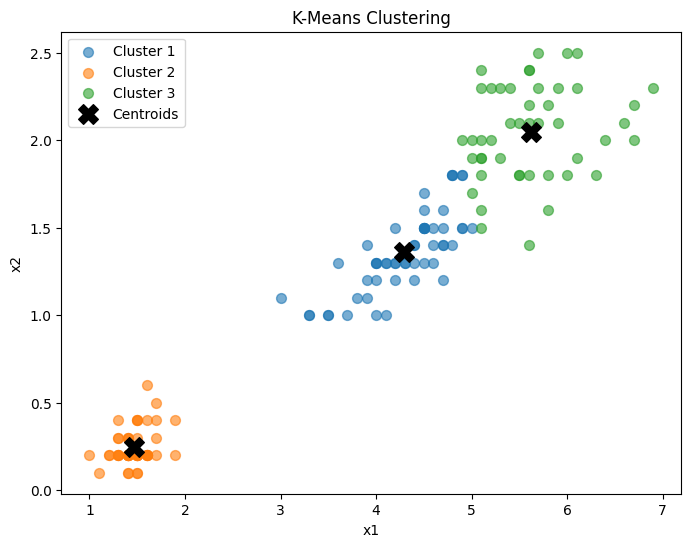

In [16]:
plt.figure(figsize=(8,6))
colors = ['red', 'blue', 'green']
for i in range(3):
    plt.scatter(X[final_labels == i, 0], X[final_labels == i, 1], s=50, label=f'Cluster {i+1}', alpha=0.6)

plt.scatter(final_centroids[:, 0], final_centroids[:, 1], s=200, c='black', marker='X', label="Centroids")

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("K-Means Clustering")
plt.legend()
plt.show()

# Problem 3

In [21]:
rbf_df = pd.read_csv('/Users/aran/Desktop/Semester_2/machine learning/assignment/3/rbfClassification.csv')
print(rbf_df.head())
rbf_df.describe()

         x1        x2  cls
0 -2.427236  1.965984    1
1  2.382605  2.256614    0
2 -2.680668  2.379979    1
3 -2.620277  2.913823    0
4  1.513792 -2.312650    0


,x1,x2,cls
count,20.000000,20.000000,20.000000
mean,0.058115,0.501540,0.400000
std,2.044471,2.022644,0.502625
min,-2.926976,-2.685112,0.000000
25%,-1.913583,-1.611105,0.000000
50%,0.092500,1.005436,0.000000
75%,2.012849,2.264325,1.000000
max,2.617188,2.969098,1.000000


In [30]:
rbf_x = rbf_df[['x1','x2']].values
rbf_y = rbf_df['cls'].values
print(rbf_x)
print(rbf_y)

[[-2.42723594  1.96598377]
 [ 2.38260459  2.2566141 ]
 [-2.68066773  2.37997903]
 [-2.62027707  2.91382302]
 [ 1.51379205 -2.31264989]
 [ 2.46089372 -2.29528871]
 [ 0.92199455 -2.68511189]
 [-0.50537922 -2.30141674]
 [-0.27991124 -0.52086949]
 [-1.7423655   2.96909782]
 [ 2.61718759  0.92906934]
 [ 1.95773338  2.45968038]
 [ 2.17819698 -2.44513853]
 [-0.73668007 -1.38304357]
 [-0.58721454  2.28745607]
 [ 2.25220427  1.08180261]
 [ 0.4649106   1.58049341]
 [-2.83629982  0.7867402 ]
 [ 1.75578831  0.78054186]
 [-2.9269759   1.58302765]]
[1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1]


In [32]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(rbf_x)

KMeans(n_clusters=2, n_init=10, random_state=42)

In [34]:
centers = kmeans.cluster_centers_
print(f"Cluster centers: {centers}")

Cluster centers: [[ 1.30641042 -0.37348593]
 [-2.26014807  2.1265868 ]]


In [48]:
def rbf_transform(X, centers, gamma = 0.5):
    return np.exp(-gamma * np.linalg.norm(X[:, np.newaxis] - centers, axis=2)**2)

x_transformed = rbf_transform(rbf_x, centers)
print(f"Transformed Feature Shape: {x_transformed.shape}")  

rbf_y = rbf_y.ravel()
classifier = RidgeClassifier(alpha=1e-5)  # Regularization term
classifier.fit(x_transformed, rbf_y)


y_pred = classifier.predict(x_transformed)
accuracy = accuracy_score(rbf_y, y_pred) * 100
print(f"Classification Accuracy: {accuracy:.2f}%")

Transformed Feature Shape: (20, 2)
Classification Accuracy: 85.00%


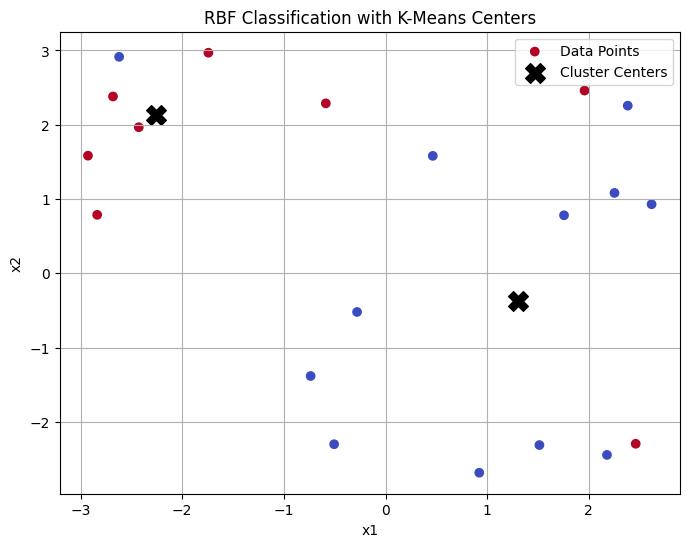

In [49]:
plt.figure(figsize=(8, 6))
plt.scatter(rbf_x[:, 0], rbf_x[:, 1], c=rbf_y, cmap="coolwarm", label="Data Points")
plt.scatter(centers[:, 0], centers[:, 1], marker="X", s=200, color="black", label="Cluster Centers")
plt.title("RBF Classification with K-Means Centers")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.show()